In [12]:
# from secret import key
# print(key)
import json

with open("secret.json") as f:
    secret_data = json.load(f)

# Extract the key
api_key = secret_data["key"]

# print("API Key:", api_key)


In [3]:
import requests

def get_directions(origin, destination, api_key):
    url = f"https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

# Example usage
if __name__ == "__main__":
    origin = "New York, NY"
    destination = "Los Angeles, CA"
    directions_data = get_directions(origin, destination, api_key)
    
    # Extracting relevant information from the response
    if 'routes' in directions_data and len(directions_data['routes']) > 0:
        route = directions_data['routes'][0]
        print("Distance:", route['legs'][0]['distance']['text'])
        print("Duration:", route['legs'][0]['duration']['text'])
        print("Steps:")
        for step in route['legs'][0]['steps']:
            print(step['html_instructions'])
            print("  Distance:", step['distance']['text'])
            print("  Duration:", step['duration']['text'])
    else:
        print("No route found.")


Distance: 2,789 mi
Duration: 1 day 17 hours
Steps:
Head <b>northwest</b> toward <b>Murray St</b><div style="font-size:0.9em">Partial restricted usage road</div>
  Distance: 230 ft
  Duration: 1 min
Continue onto <b>Murray St</b>
  Distance: 0.1 mi
  Duration: 1 min
Turn <b>right</b> onto <b>Church St</b>
  Distance: 0.1 mi
  Duration: 1 min
Turn <b>left</b> at the 3rd cross street onto <b>Reade St</b>
  Distance: 0.1 mi
  Duration: 1 min
Turn <b>right</b> onto <b>Hudson St</b>
  Distance: 0.4 mi
  Duration: 2 mins
Keep <b>right</b> to stay on <b>Hudson St</b>
  Distance: 0.3 mi
  Duration: 2 mins
Continue onto <b>I-78 W</b>/<wbr/><b>Holland Tunnel</b><div style="font-size:0.9em">Continue to follow I-78 W</div><div style="font-size:0.9em">Entering New Jersey</div>
  Distance: 2.2 mi
  Duration: 6 mins
Keep <b>left</b> to continue on <b>NJ-139 W</b>, follow signs for <b>Pulaski Skyway</b>/<wbr/><b>W 139 W</b>/<wbr/><b>US 1-9</b>/<wbr/><b>I-280</b>/<wbr/><b>Kennedy Blvd</b>/<wbr/><b>Jerse

In [7]:
import requests
import webbrowser

def get_directions(origin, destination, api_key):
    url = f"https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

def get_static_map_path(origin, destination, api_key):
    directions_data = get_directions(origin, destination, api_key)
    
    if 'routes' in directions_data and len(directions_data['routes']) > 0:
        route = directions_data['routes'][0]
        polyline = route['overview_polyline']['points']
        map_url = f"https://maps.googleapis.com/maps/api/staticmap?size=600x400&path=enc:{polyline}&key={api_key}"
        return map_url
    else:
        return None

# Example usage
if __name__ == "__main__":
    origin = "New York, NY"
    destination = "Los Angeles, CA"
    map_url = get_static_map_path(origin, destination, api_key)
    
    if map_url:
        print("Static Map URL:", map_url)
        webbrowser.open(map_url)
    else:
        print("No route found.")


Static Map URL: https://maps.googleapis.com/maps/api/staticmap?size=600x400&path=enc:gunwFblubMa}HxpBmeHxuJ}jNbdYnfDz`VapHroa@q]hsq@i{Bfr_AibKb{Gdv@tiQ{dNjrZteAd{uArhGx|vA_sA|h[hcFpvn@aaPrgs@xbFz_f@cr@rdf@zdAxtZb`Nlde@{kEdz_@g\fz\zfBjm[}qFrrf@exRpct@k|Epwi@mlAxfe@eaDj~{AfRtggA`u@rbrAziFz|nAbtExjSkpIlkQoqMxkOiO`kd@yu@h~kA}wNrrm@uaHrie@~r@`vp@bkGrtl@}{@p`n@y_Hhtw@opg@bx~BvC~ewBueD|tfAacHlfb@mvPpmu@jLrd~@|eClfsBjy@hcn@g`Afyr@pu^xwtA_w@n`wBfhQdhvBt~S|gn@tMjw_@ng@`ftBkzD|um@vjAt}g@wiIflwBijRldHcuIryE{QbsOoRhm`@wkExok@{qBhm}@sdG~npAkPj}dCbiDvxdFzwBbp]qKbj[tnIz_Bn_G`gYtqAz{LjzH~yy@iRphh@}M~z|B{@xisAv{j@rii@|iHnj]fMtoR|cY`vi@hyQdePzkKfkQfmGpdm@tuKr~[}BbzlAlAjlaAKdduBcCn_m@`bOh}j@tyL|puAyvJl`zBu~r@rj}B_rZnm}BlsDxbvAjoF|rbBbsJptj@zgMzyVr`PpinAn|e@dntAjpl@zid@z|Znim@d`Elr_AdgAxcq@jrNfry@vsKnl^xk\lk_@`gWdqf@noMp_`@zcFhtNk}@txT_uDbe]icAxg]rnIj~IlG`pTz`Ifcf@dxR|lTveGbtCeoIzoKofP|xU~uBph[{dG|e]a|CtjSnpFznWxtHvrv@fsFvlp@fjEjzw@dwApv\nwRtim@fxPrdU~kSr{Hp{R~xNvT|mj@ugR|enA`xCzvXvbQ`eTxu^nlo@ml@|mfA_dCvi

226:227: syntax error: Expected “"” but found unknown token. (-2741)
327:328: syntax error: Expected “"” but found unknown token. (-2741)
328:329: syntax error: Expected “"” but found unknown token. (-2741)
327:328: syntax error: Expected “"” but found unknown token. (-2741)


In [8]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_directions(origin, destination, api_key):
    url = f"https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

def get_static_map_path(origin, destination, api_key):
    directions_data = get_directions(origin, destination, api_key)
    
    if 'routes' in directions_data and len(directions_data['routes']) > 0:
        route = directions_data['routes'][0]
        polyline = route['overview_polyline']['points']
        map_url = f"https://maps.googleapis.com/maps/api/staticmap?size=600x400&path=enc:{polyline}&key={api_key}"
        return map_url
    else:
        return None

def segment_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Perform thresholding
    _, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Perform morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Label markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply watershed algorithm
    segmented_image = cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]  # Mark watershed boundaries
    
    return segmented_image

# Example usage
if __name__ == "__main__":
    origin = "New York, NY"
    destination = "Los Angeles, CA"
    map_url = get_static_map_path(origin, destination, api_key)
    
    if map_url:
        # Retrieve the image from URL
        response = requests.get(map_url)
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, -1)

        # Perform segmentation
        segmented_image = segment_image(image)

        # Display segmented output
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("No route found.")


error: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


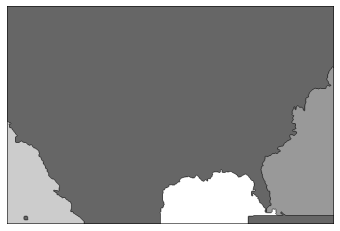

In [10]:
"""
It seems there's an issue with the depth of the input image when converting it 
to RGB format using OpenCV. This error typically occurs because the input image's 
depth is not supported by the cv2.cvtColor() function.

To address this issue, we need to ensure that the input image has the correct 
depth before performing the conversion. In this case, it seems the issue is 
caused by the fact that the image loaded from the URL might have an alpha channel 
(4 channels) instead of the usual 3 channels for RGB images.

We can fix this by removing the alpha channel before converting the image to RGB 
format. Here's the modified code:

"""


import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_directions(origin, destination, api_key):
    url = f"https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

def get_static_map_path(origin, destination, api_key):
    directions_data = get_directions(origin, destination, api_key)
    
    if 'routes' in directions_data and len(directions_data['routes']) > 0:
        route = directions_data['routes'][0]
        polyline = route['overview_polyline']['points']
        map_url = f"https://maps.googleapis.com/maps/api/staticmap?size=600x400&path=enc:{polyline}&key={api_key}"
        return map_url
    else:
        return None

def segment_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
    
# Apply Gaussian blur to reduce noise and produce more stable gradient estimates,
#which are useful for identifying edges and regions of interest
#preserve edge, help preprocessing for thresholding,
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
#Thresholding to create a binary image where pixels with intensities above a 
#certain threshold are set to white (255) and others are set to black (0).
    _, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
# Perform morphological operations to remove small noise and background artifacts.
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
# Finding sure foreground area
"""
The distance transform is calculated from the opening result to identify regions
likely to be the foreground (objects).
cv2.distanceTransform() calculates the distance to the closest zero pixel 
for each pixel in the opening result
"""
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Label markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply watershed algorithm
    segmented_image = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_BGRA2BGR), markers)
    image[markers == -1] = [0, 0, 255]  # Mark watershed boundaries
    
    return segmented_image

if __name__ == "__main__":
    origin = "New York, NY"
    destination = "Los Angeles, CA"

    map_url = get_static_map_path(origin, destination, api_key)
    
    if map_url:
        # Retrieve the image from URL
        response = requests.get(map_url)
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_UNCHANGED)  # Load image with alpha channel
        
        # Perform segmentation
        segmented_image = segment_image(image)

        # Display segmented output
        plt.imshow(segmented_image, cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        print("No route found.")


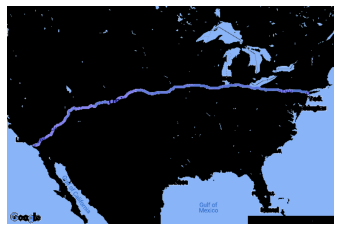

In [11]:
"""

If there's a blue line representing the path from New York to Los Angeles in the 
original map image, and it's not visible in the segmented output, it's likely 
because the segmentation process is removing or altering the blue color of the
line.

To ensure that the blue line representing the path remains visible in the 
segmented output, you can modify the segmentation process to preserve or 
enhance the blue color. One way to achieve this is by applying color-based 
segmentation techniques that focus on preserving or enhancing specific colors 
in the image.
"""
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_directions(origin, destination, api_key):
    url = f"https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

def get_static_map_path(origin, destination, api_key):
    directions_data = get_directions(origin, destination, api_key)
    
    if 'routes' in directions_data and len(directions_data['routes']) > 0:
        route = directions_data['routes'][0]
        polyline = route['overview_polyline']['points']
        map_url = f"https://maps.googleapis.com/maps/api/staticmap?size=600x400&path=enc:{polyline}&key={api_key}"
        return map_url
    else:
        return None

def segment_image(image):
    # Define lower and upper bounds for blue color in HSV
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])
    
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # Bitwise-AND mask and original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
"""
This operation preserves only the pixels in the original image where 
the corresponding pixel in the mask is white (255).cv2.inRange() function 
returns a binary mask where pixels that fall within the specified color range 
are set to 255 (white), and pixels outside the range are set to 0 (black). 
This mask will be used to select the blue pixels from the original image.

"""    
    return segmented_image

# Example usage
if __name__ == "__main__":
    origin = "New York, NY"
    destination = "Los Angeles, CA"

    map_url = get_static_map_path(origin, destination, api_key)
    
    if map_url:
        # Retrieve the image from URL
        response = requests.get(map_url)
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Load image in BGR color space
        
        # Perform segmentation
        segmented_image = segment_image(image)

        # Display segmented output
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("No route found.")
